In [1]:
from accelerator import *
import matplotlib.pyplot as plt
import numpy as np

In [7]:
mu = np.pi / 3
ring = CustomThin(np.array([[np.cos(mu), np.sin(mu), 0],
                              [-np.sin(mu), np.cos(mu), 0],
                              [0, 0, 1]]))
sextupole = SextupoleThin(2)
lat = Lattice([ring, sextupole])

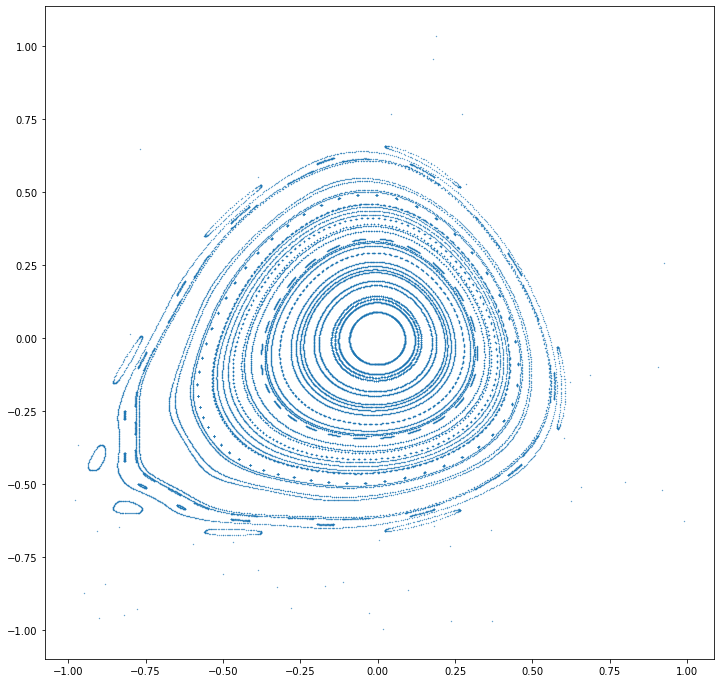

In [8]:
init = phasespace=Beam(n_particles=50, emittance=0.01, energy=1).match(ring.m_h.twiss_solution)
init = np.vstack(init)
outputs = [init]
for _ in range(1000):
    _, u, u_prime, dp = lat.transport(outputs[-1])
    # keep just the end result
    u = u[-1]
    u_prime = u_prime[-1]
    dp = dp[-1]
    # get rid of diverged particles
    keep_mask = (abs(u)< 1) & (abs(u_prime) < 1)
    outputs.append(np.vstack([u, u_prime, dp])[:, keep_mask])

outputs = np.hstack(outputs)
u = outputs[0, :]
u_prime = outputs[1, :]

plt.figure(figsize=(12, 12))
plt.scatter(u, u_prime, 0.1)